In [1]:
import os
import numpy as np
import awkward as ak

import matplotlib
import matplotlib.pyplot as plt
import mplhep as hep

from coffea.nanoevents import NanoEventsFactory, NanoAODSchema

fontsize=12
plt.style.use([hep.style.ROOT, {'font.size': fontsize}])
plt.rcParams.update({'font.size': fontsize})
plt.rcParams.update({'figure.figsize' : (6, 6)})

In [5]:
fname = "root://storage01.lcg.cscs.ch:1096//pnfs/lcg.cscs.ch/cms/trivcat//store/user/dvalsecc/ttHbb_p1j_EFT_signal_EFTcenter/SMEFTsim_topU3l_EFT_5F_tbarqqtlnu_madspin_reweightall_v1/240503_152451/0002/test_eft_2792.root"
events = NanoEventsFactory.from_root(
    fname,
    schemaclass=NanoAODSchema.v6,
    #metadata=metadata,
).events()

/usr/local/lib/python3.8/site-packages/coffea/nanoevents/schemas/nanoaod.py:201: RuntimeWarning: Missing cross-reference index for Electron_genPartIdx => GenPart
  warnings.warn(
/usr/local/lib/python3.8/site-packages/coffea/nanoevents/schemas/nanoaod.py:201: RuntimeWarning: Missing cross-reference index for Electron_jetIdx => Jet
  warnings.warn(
/usr/local/lib/python3.8/site-packages/coffea/nanoevents/schemas/nanoaod.py:201: RuntimeWarning: Missing cross-reference index for Electron_photonIdx => Photon
  warnings.warn(
/usr/local/lib/python3.8/site-packages/coffea/nanoevents/schemas/nanoaod.py:201: RuntimeWarning: Missing cross-reference index for FatJet_subJetIdx1 => SubJet
  warnings.warn(
/usr/local/lib/python3.8/site-packages/coffea/nanoevents/schemas/nanoaod.py:201: RuntimeWarning: Missing cross-reference index for FatJet_subJetIdx2 => SubJet
  warnings.warn(
/usr/local/lib/python3.8/site-packages/coffea/nanoevents/schemas/nanoaod.py:201: RuntimeWarning: Missing cross-reference 

In [6]:
parts = events.LHEPart

In [10]:
ak.sum(parts.status == 1, axis=1) - 8 

<Array [1, 1, 1, 1, 1, 0, ... 1, 1, 1, 1, 1, 1] type='1954 * int64'>

(array([ 407.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1547.]),
 array([8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ]),
 <BarContainer object of 10 artists>)

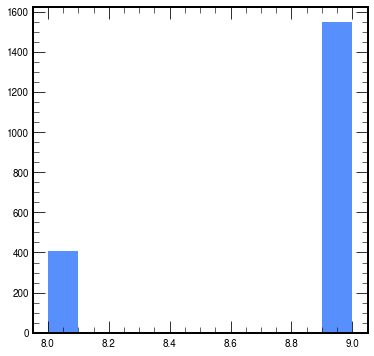

In [9]:
plt.hist(ak.sum(parts.status == 1, axis=1))

In [7]:
parts.pdgId[0:10].tolist()

[[21, 21, 5, -13, 14, -5, 1, -2, 5, -5],
 [21, 21, 5, -15, 16, -5, 1, -2, 5, -5],
 [21, -3, 5, -11, 12, -5, 3, -4, 5, -5, -3],
 [1, 21, 5, -13, 14, -5, 3, -4, 5, -5, 1],
 [-2, 2, 5, -15, 16, -5, 3, -4, 5, -5, 21],
 [-2, 2, 5, -13, 14, -5, 3, -4, 5, -5, 21],
 [21, 21, 5, -11, 12, -5, 1, -2, 5, -5, 21],
 [21, 2, 5, -15, 16, -5, 1, -2, 5, -5, 2],
 [21, 21, 5, -11, 12, -5, 3, -4, 5, -5, 21],
 [2, 21, 5, -11, 12, -5, 3, -4, 5, -5, 2]]

In [8]:
parts_final_status = parts[parts.status==1]

In [11]:
parts_final_status[0:10].pdgId.tolist()

[[5, -13, 14, -5, 1, -2, 5, -5],
 [5, -15, 16, -5, 1, -2, 5, -5],
 [5, -11, 12, -5, 3, -4, 5, -5, -3],
 [5, -13, 14, -5, 3, -4, 5, -5, 1],
 [5, -15, 16, -5, 3, -4, 5, -5, 21],
 [5, -13, 14, -5, 3, -4, 5, -5, 21],
 [5, -11, 12, -5, 1, -2, 5, -5, 21],
 [5, -15, 16, -5, 1, -2, 5, -5, 2],
 [5, -11, 12, -5, 3, -4, 5, -5, 21],
 [5, -11, 12, -5, 3, -4, 5, -5, 2]]

In [26]:
parts_jets = parts_final_status[ (abs(parts_final_status.pdgId)<11)|(parts_final_status.pdgId==21)]
parts_lepton = parts_final_status[ (abs(parts_final_status.pdgId)==11) | (abs(parts_final_status.pdgId)==13) | (abs(parts_final_status.pdgId)==15) ]

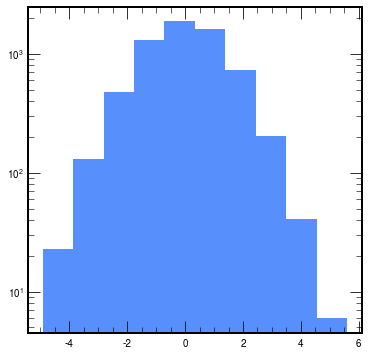

In [19]:
plt.hist(ak.flatten(parts_jets.eta))
plt.yscale("log")

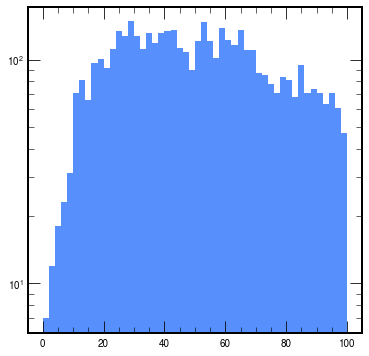

In [21]:
plt.hist(ak.flatten(parts_jets.pt), bins=50, range=(0,100))
plt.yscale("log")

In [37]:
sum(ak.sum(parts_jets.pt < 10, axis=1)!=0) / len(parts_jets)

0.09523809523809523

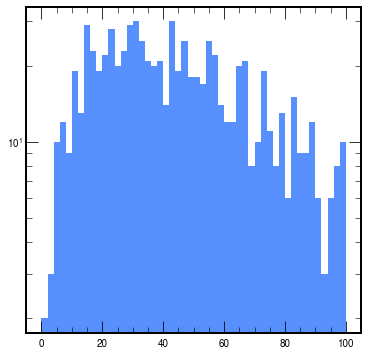

In [27]:
plt.hist(ak.flatten(parts_lepton.pt), bins=50, range=(0,100))
plt.yscale("log")

In [34]:
sum(ak.sum(parts_lepton.pt < 10, axis=1)) / len(parts_lepton)

0.0380952380952381

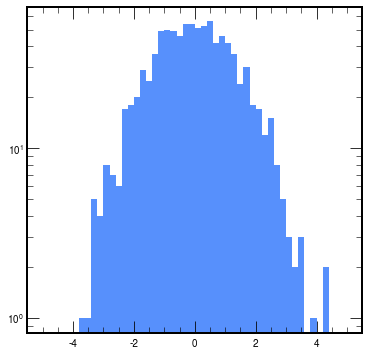

In [28]:
plt.hist(ak.flatten(parts_lepton.eta), bins=50, range=(-5,5))
plt.yscale("log")

In [17]:
parts_jets.eta[0:10].tolist()

[[-2.021484375,
  -0.921173095703125,
  -0.8509521484375,
  -0.874237060546875,
  -0.37835693359375,
  -1.82574462890625],
 [0.597015380859375,
  1.3824462890625,
  -0.7427978515625,
  0.4645843505859375,
  2.16162109375,
  -0.3974456787109375],
 [-0.47418212890625,
  -1.9495849609375,
  -1.44342041015625,
  -1.5494384765625,
  -2.094970703125,
  -1.26434326171875,
  -2.6884765625],
 [-1.25970458984375,
  -1.03485107421875,
  0.21950531005859375,
  -0.87872314453125,
  -1.22052001953125,
  -0.512420654296875,
  -1.408935546875],
 [-0.21465301513671875,
  -0.96142578125,
  -0.7882080078125,
  0.07238388061523438,
  0.661834716796875,
  0.3523712158203125,
  -1.89007568359375],
 [-1.37860107421875,
  -0.9229736328125,
  -0.726654052734375,
  -1.083984375,
  0.484527587890625,
  -1.08001708984375,
  -2.34765625],
 [1.24432373046875,
  -0.23235321044921875,
  0.02884387969970703,
  -1.1708984375,
  -0.21273040771484375,
  -0.4576568603515625,
  -3.750732421875],
 [-1.17987060546875,
  -0.4